In [192]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.transforms as transforms

In [193]:
base_path= '/content/drive/MyDrive/roco-content'
data_splits = ['train', 'test', 'validation']
subfolders = ['radiology', 'non-radiology']
sample_size_per_category = 1000
data= []


In [194]:
for split in data_splits:
    for subfolder in subfolders:
        caption_file = os.path.join(base_path, split, subfolder, 'captions.txt')
        image_folder = os.path.join( base_path, split, subfolder, 'images')

        # Read a subset of captions
        with open(caption_file, 'r') as file:
            # Collect only the first `sample_size_per_category` captions
            for i, line in enumerate(file):
                if i >= sample_size_per_category:
                    break

                match = re.match(r"^(\S+)\s+(.*)$", line.strip())
                if match:
                    image_id = match.group(1)
                    caption = match.group(2)
                    image_path = os.path.join(image_folder, f"{image_id}.jpg")


                    data.append({
                        'image_id': image_id,
                        'caption': caption,
                        'label': subfolder,
                        'split': split,
                        'image_path': image_path
                    })

In [195]:
sample_df = pd.DataFrame(data)
print("Sample DataFrame created with columns:", sample_df.columns)

Sample DataFrame created with columns: Index(['image_id', 'caption', 'label', 'split', 'image_path'], dtype='object')


In [196]:
print(sample_df.head(5))

     image_id                                            caption      label  \
0  ROCO_00002  Computed tomography scan in axial view showing...  radiology   
1  ROCO_00003  Bacterial contamination occurred after complet...  radiology   
2  ROCO_00004  The patient had residual paralysis of the hand...  radiology   
3  ROCO_00005      Panoramic radiograph after immediate loading.  radiology   
4  ROCO_00007  Plain abdomen x-ray: Multiple air levels at th...  radiology   

   split                                         image_path  
0  train  /content/drive/MyDrive/roco-content/train/radi...  
1  train  /content/drive/MyDrive/roco-content/train/radi...  
2  train  /content/drive/MyDrive/roco-content/train/radi...  
3  train  /content/drive/MyDrive/roco-content/train/radi...  
4  train  /content/drive/MyDrive/roco-content/train/radi...  


In [197]:
sample_df.tail(5)

,image_id,caption,label,split,image_path
5218,ROCO_87894,Scanning electron photomicrograph of blood cel...,non-radiology,validation,/content/drive/MyDrive/roco-content/validation...
5219,ROCO_87904,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation,/content/drive/MyDrive/roco-content/validation...
5220,ROCO_87918,Under visualization through the anterolateral ...,non-radiology,validation,/content/drive/MyDrive/roco-content/validation...
5221,ROCO_87936,The endoscopic view demonstrated progressive d...,non-radiology,validation,/content/drive/MyDrive/roco-content/validation...
5222,ROCO_87952,A 7 Fr Kimny guiding catheter (Boston Scientif...,non-radiology,validation,/content/drive/MyDrive/roco-content/validation...


In [198]:
sample_df.describe()

,image_id,caption,label,split,image_path
count,5223,5223,5223,5223,5223
unique,5223,5215,2,3,5223
top,ROCO_00002,Trocar placement.,radiology,train,/content/drive/MyDrive/roco-content/train/radi...
freq,1,3,3000,2000,1


In [199]:
sample_df['caption_length']= sample_df['caption'].astype(str).apply(len)
print("Average caption length:", sample_df['caption_length'].mean())

Average caption length: 146.16695385793605


<Axes: xlabel='caption_length', ylabel='Count'>

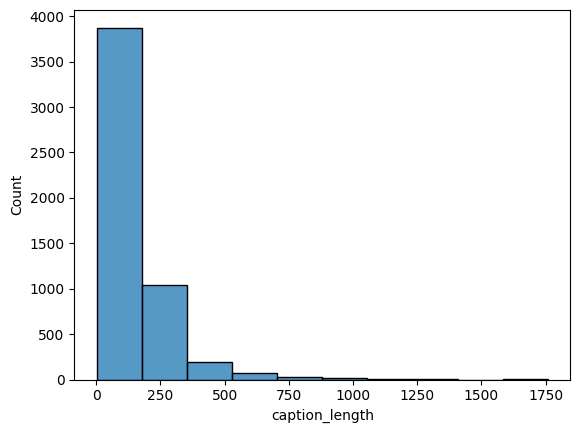

In [200]:
import seaborn as sns
sns.histplot(sample_df['caption_length'], bins=10)

In [201]:
print("Top 5 frequent words:", pd.Series(' '.join(sample_df['caption']).split()).value_counts().head(5))


Top 5 frequent words: the    7689
of     5454
and    2463
in     2186
a      1757
Name: count, dtype: int64


In [135]:
sample_df = sample_df.groupby(['split', 'label']).apply(lambda x: x.sample(1)).reset_index(drop=True)


<ipython-input-135-ee6a3af6af82>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = sample_df.groupby(['split', 'label']).apply(lambda x: x.sample(1)).reset_index(drop=True)


In [202]:
import pandas as pd
from PIL import Image
from IPython.display import Image as IPImage, display
import os

In [203]:
def load_image_for_display(image_path):
    # Return an IPImage that will be shown in Jupyter Notebooks
    return IPImage(filename=image_path)

In [206]:
sample_df_limited = sample_df.head(5)

In [208]:
image_paths = []
captions = []

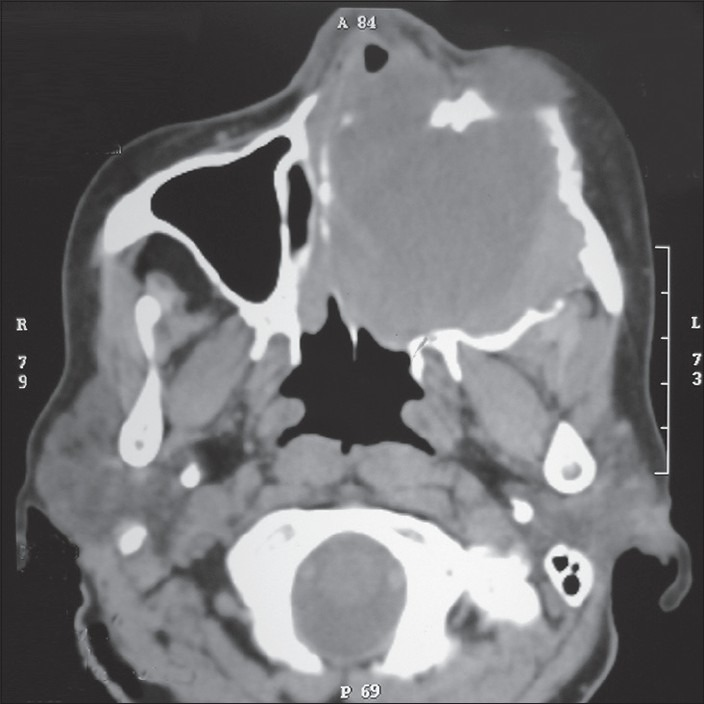

Caption: Computed tomography scan in axial view showing obliteration of the left maxillary sinus



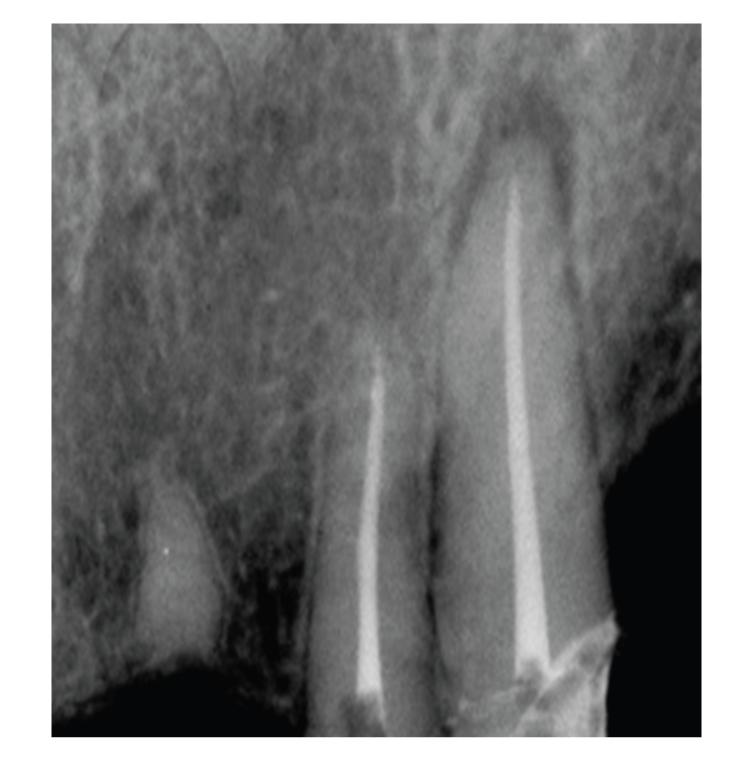

Caption: Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month.



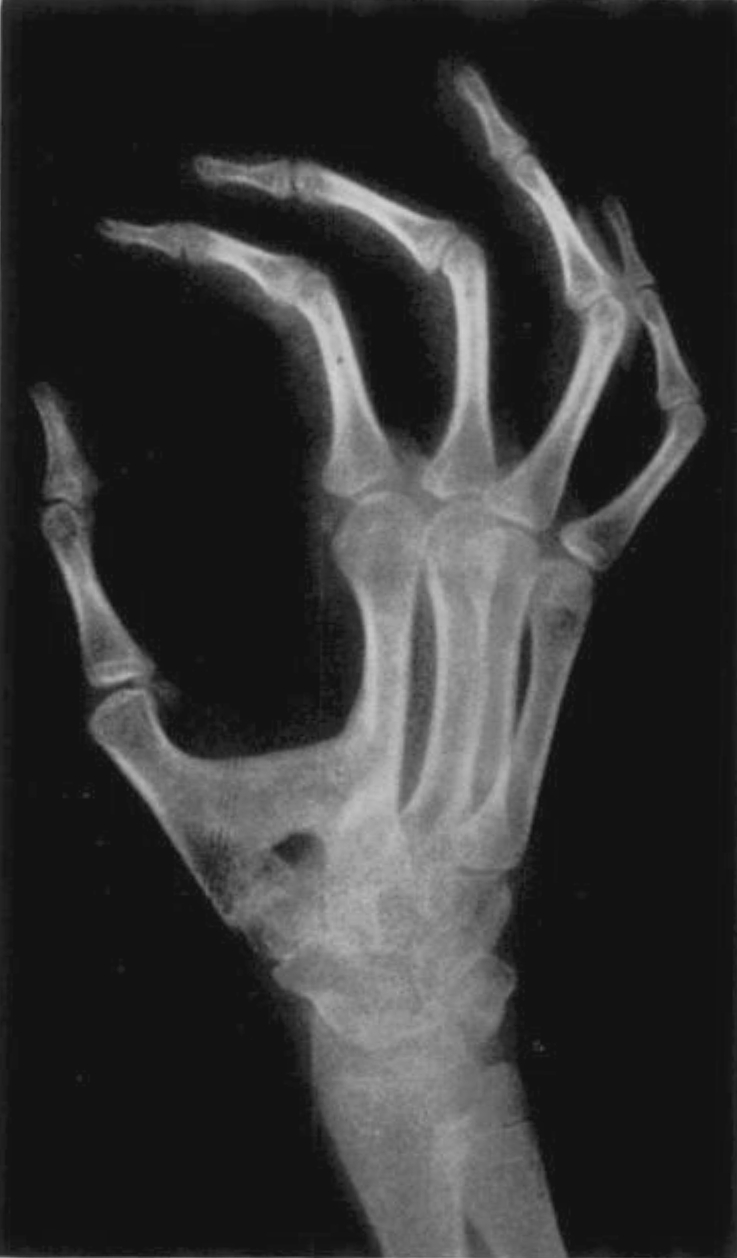

Caption: The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows the complete healing of the graft one year later.



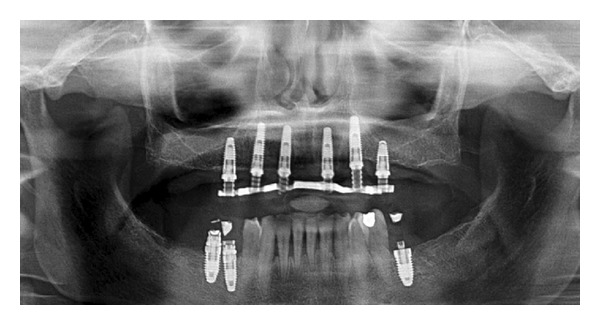

Caption: Panoramic radiograph after immediate loading.



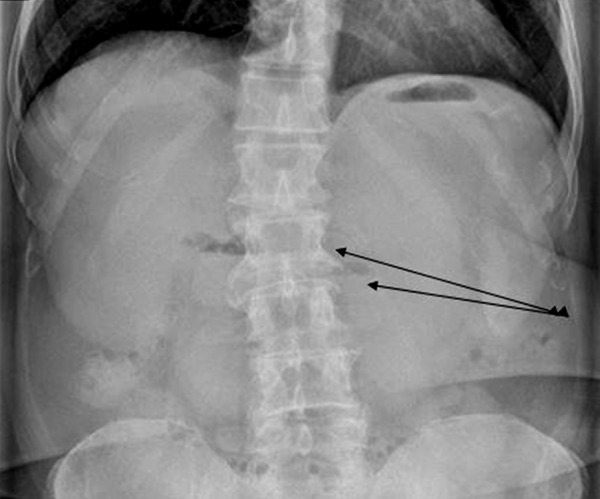

Caption: Plain abdomen x-ray: Multiple air levels at the mid-abdomen (arrows), no radiopaque shadow, and no air under the diaphragm.



In [209]:
for index, row in sample_df_limited.iterrows():
    image_id = row['image_id']
    caption = row['caption']
    split = row['split']
    label = row['label']

    image_path = os.path.join(base_path, split, label, 'images', f"{image_id}.jpg")

    # Display the image using IPython's Image function
    image_path = os.path.join( base_path, split, label, 'images', f"{image_id}.jpg")

    # Display the image using IPython's Image function
    display(IPImage(filename=image_path))

    # Display the caption for that image
    print(f"Caption: {caption}\n")

In [211]:
df_with_images = pd.DataFrame({
    'Image': image_paths,
    'Caption': captions
})

# Display the DataFrame with images inline
display(df_with_images)

,Image,Caption


In [212]:
from wordcloud import WordCloud

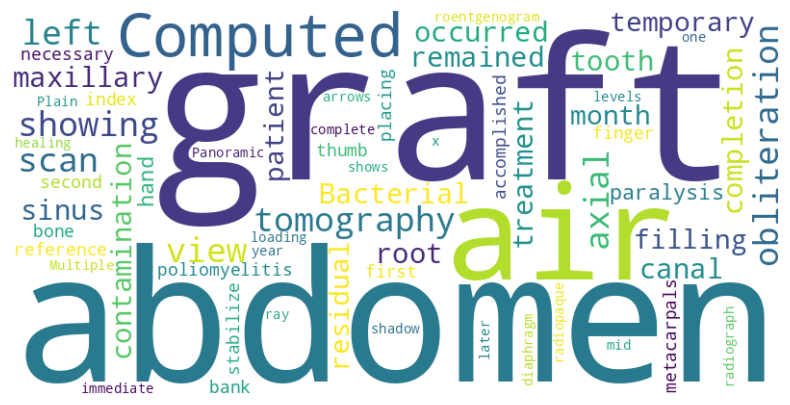

In [213]:
all_captions = ' '.join(sample_df_limited['caption'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [215]:
# **Hyperparameters**
in_channel = 3
num_classes = 2  # Change according to your labels
learning_rate = 3e-4
batch_size = 32
num_epochs = 10

In [216]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally with 50% probability
    transforms.RandomRotation(degrees=15),   # Randomly rotate images by up to 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, etc.
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),  # Randomly crop and resize
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

In [217]:
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        # Create a label map (assuming 'label' column in dataframe)
        self.label_map = {label: idx for idx, label in enumerate(dataframe['label'].unique())}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_path = self.dataframe.iloc[idx, 4]  # Assuming image path is in the first column
        label = self.dataframe.iloc[idx, 2]  # Assuming label is in the second column

        # Convert label to numerical using label_map
        label = self.label_map[label]

        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # Assuming you have a 'caption' column in your dataframe:
        caption = self.dataframe.iloc[idx, 1]  # Adjust column index if needed

        return image, label, caption # Return image, label and caption

In [221]:
# **Create Train, Validation, Test Split DataFrames**
train_df = sample_df[sample_df['split'] == 'train'].reset_index(drop=True)
validation_df = sample_df[sample_df['split'] == 'validation'].reset_index(drop=True)
test_df = sample_df[sample_df['split'] == 'test'].reset_index(drop=True)

In [222]:
train_dataset = CustomImageDataset(dataframe=train_df, transform=transform)
validation_dataset = CustomImageDataset(dataframe=validation_df, transform=transform)
test_dataset = CustomImageDataset(dataframe=test_df, transform=transform)


In [223]:
# **DataLoaders**
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=30,
    shuffle=True,
    num_workers=0,
    pin_memory=True,
    drop_last= False
)
validation_loader = DataLoader(
    dataset=validation_dataset,
    batch_size=30,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    drop_last= False
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=30,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    drop_last= False
)


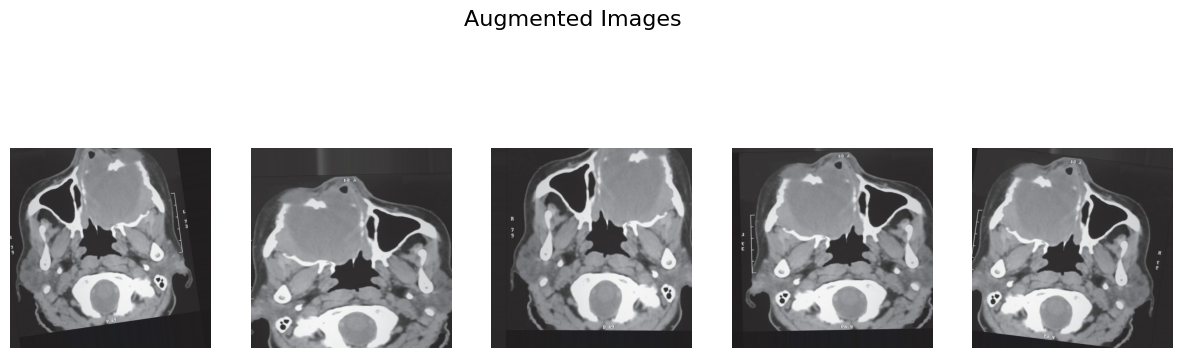

In [224]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

# Set up your augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=15,              # Rotate images by up to 15 degrees
    width_shift_range=0.1,          # Shift image width by 10%
    height_shift_range=0.1,         # Shift image height by 10%
    shear_range=0.1,                # Shear by 10%
    zoom_range=0.2,                 # Zoom by up to 20%
    horizontal_flip=True,           # Flip horizontally
    fill_mode='nearest'             # Fill in new pixels with nearest value
)

def visualize_augmentation(img_path, num_augmented_images=5):
    """Display a specified number of augmented images for a single image."""
    img = load_img(img_path)  # Load the image
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for ImageDataGenerator

    # Set up the plot
    fig, axes = plt.subplots(1, num_augmented_images, figsize=(15, 4))
    fig.suptitle("Augmented Images", fontsize=16, y=1.05)

    # Adjust layout to remove excessive white space
    plt.subplots_adjust(top=0.8, hspace=0.2, wspace=0.2)

    # Generate and display augmented images
    i = 0
    for batch in datagen.flow(img_array, batch_size=1):
        ax = axes[i]
        ax.imshow(batch[0].astype('uint8'))
        ax.axis('off')
        i += 1
        if i >= num_augmented_images:  # Display only the specified number of images
            break

    plt.show()

# Example usage:
# Visualize augmentations for one image
img_path = train_df.iloc[0]['image_path']  # Path to an image in your DataFrame
visualize_augmentation(img_path, num_augmented_images=5)  # Display 5 augmented images


In [254]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import textwrap

# Denormalize the image from tensor values (assuming normalization was applied)
def denormalize_image(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406])  # Example mean for ImageNet
    std = torch.tensor([0.229, 0.224, 0.225])   # Example std for ImageNet
    tensor = tensor * std[:, None, None] + mean[:, None, None]
    return tensor.permute(1, 2, 0).clamp(0, 1).numpy()

# Function to show images from a batch with captions in multiple rows and columns
def show_batch_images(data_loader):
    data_iter = iter(data_loader)  # Create an iterator for the data loader
    images, labels, captions = next(data_iter)  # Get the next batch of data

    # Get the number of images in the batch
    num_images = images.shape[0]
    cols = 4  # Set number of columns
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate rows dynamically

    # Create a figure and subplots to display the images
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Iterate over the images and display them
    for i in range(num_images):
        image = denormalize_image(images[i])  # Denormalize the image to view it correctly
        axes[i].imshow(image)  # Display the image

        # Wrap long captions to avoid overlap
        wrapped_caption = textwrap.fill(captions[i], width=40)  # Adjust width as needed
        axes[i].set_title(f"Label: {labels[i].item()}\nCaption: {wrapped_caption}", fontsize=10)

        axes[i].axis('off')  # Turn off axis labels

    # Hide any unused subplots
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()  # Show the plot

# Check preprocessing and augmentation with train_loader
print("Displaying a batch from train_loader with preprocessing and augmentation applied:")
show_batch_images(train_loader)


Output hidden; open in https://colab.research.google.com to view.